# Logistic Regression<br>
### Data Visualization
- Load relevent libraries
- Import data into dataframe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("./Data/ex2data1.txt", header = None)
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


We will dicover our data by plotting it and discover the relationship as I said beofre this give us * intuition about how our model will work *

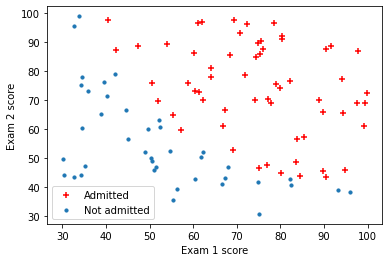

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1] , c = "r", marker = "+")
plt.scatter(X[neg[:, 0], 0] ,X[neg[:, 0], 1], marker="o", s = 10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

Students with higher test score for both exam were admitted into the university as expected.

Now let's implement our * sigmoid * function for Logistic Regression the * sigmoid * funcation which is the main difference between Linear Regression and Logistic Regression<br>

Input: z -> weight<br>


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Let's test this funcatiom

In [6]:
sigmoid(0)

0.5

Well it worked, Now let's implement our cost function<br>
Input: theta -> weights<br>
&emsp; &emsp; &emsp; &ensp;X -> features<br>
&emsp; &emsp; &emsp; &ensp;y -> class label<br>

Output: theta -> optimized weights<br>
&emsp; &emsp; &emsp; &ensp; gradient -> the gradient

In [7]:
def costFunction(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))
    cost = 1/m * sum(error)
    gradient = 1/m * np.dot(X.transpose(), (predictions - y))
    return cost[0], gradient

Now let's implement a funcation to normailze our feature to speed up our calculations<br>
Input: X -> array of the feature values<br>

Output: X_norm -> normailzed values<br>
&emsp; &emsp; &emsp; &ensp; mean -> the mean of the feature<br>
&emsp; &emsp; &emsp; &ensp; std -> the standard deviation of the feature<br>

In [8]:
def featureNormalization(X):
    mean = np.mean(X, axis = 0)
    std = np.mean(X, axis = 0)

    X_norm = (X - mean)/std
    return X_norm, mean, std

Let's test what we have done so far

In [9]:
m, n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X = np.append(np.ones((m, 1)), X, axis = 1)
y = y.reshape(m, 1)
initial_theta = np.zeros((n+1, 1))
cost, gradient = costFunction(initial_theta, X, y)
print("Cost of initial theta is", cost)
print("Gradient at initial theta (zeros):", gradient)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.08294386]
 [-0.07007705]]


Now we will implement the * gradient descent * funcation<br>
Input: X -> features<br>
&emsp; &emsp; &emsp; &ensp;y -> actual value<br>
&emsp; &emsp; &emsp; &ensp;theta -> intial weights<br>
&emsp; &emsp; &emsp; &ensp;alpha -> learning rate<br>
&emsp; &emsp; &emsp; &ensp;num_iters -> number of iteration<br>

Output: theta -> optimized weights<br>
&emsp; &emsp; &emsp; &ensp; J_history -> cost per iteration (later will be used to plot the cost as to make sure our funcation works fine)

In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        cost, gradient = costFunction(theta, X, y)
        theta = theta - (alpha * gradient)
        J_history.append(cost)
    
    return theta, J_history

### ** Building our Model **

In [11]:
theta, J_history = gradientDescent(X, y, initial_theta, 1, 400)
print("Theta optimized by gradient descent:", theta)
print("The cost of the optimized theta:", J_history[-1])

Theta optimized by gradient descent: [[0.96114285]
 [7.51545759]
 [7.16720082]]
The cost of the optimized theta: 0.23555800317577255


Plotting the history of our cost funcation

Text(0.5, 1.0, 'Cost function using Gradient Descent')

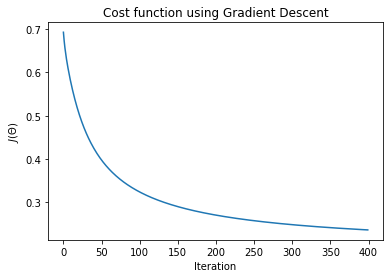

In [12]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

** Plotting the decision boundary **
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$


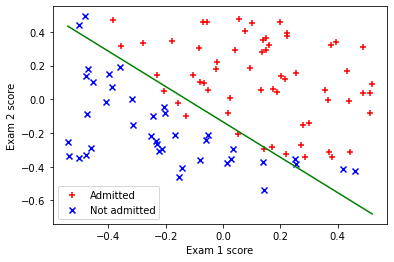

In [13]:
plt.scatter(X[pos[:, 0], 1], X[pos[:, 0], 2], c = "r", marker = "+", label = "Admitted")
plt.scatter(X[neg[:, 0], 1], X[neg[:, 0], 2], c = "b", marker = "x", label = "Not admitted")
x_value = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_value = -(theta[0] + theta[1] * x_value) / theta[2]
plt.plot(x_value, y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc = 0)

Let's use our model to make predication

In [14]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.6524827063608672


Let's implement a prediction function so that it would be easy to test our model accuracy<br>
Input: theta -> weights<br>
&emsp; &emsp; &emsp; &ensp;X -> features<br>


Output: model prediction if the predicted value > 0 then our output would be true otherwise false

In [15]:
def classifierPredict(theta, X):
    predictions = X.dot(theta)
    return predictions > 0

p = classifierPredict(theta,X)
print("Train Accuracy:", sum(p == y)[0], "%")

Train Accuracy: 89 %
